<a href="https://colab.research.google.com/github/AiDAPT-A/2024-Q3-ai-in-architecture/blob/main/tutorials/6_2_urban_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-tutorial 6.2. Urban similarity: recap, tips, and tricks

## 📌 Overview
The goal of this mini-tutorial is to broaden your perspective on how to conduct urban data-driven analysis at scale by computing *combined building representations*.
More specifically, you will automatically extract both aerial and street view imagery from building footprints and corresponding geographical information. Then, you will combine meaningful building image features computed via pre-trained computer vision foundation models. Finally, you will be able to visualize and interpret urban similarity maps.

<center>
<img src="https://drive.google.com/uc?export=view&id=1MTyLD8q6gbzUNKqCAx0z4C5XDyO1Ezvn" alt="floor-layout" class="center" width="1000px">
</center>

### 🧠 **Learning objectives**
- Visualize and interpret *urban* representations at scale
- Create a customized dataset of aerial and street view images
- Generate a combined representation by concatenating embeddings computed from both aerial and street view images

### 🐍 **New in Python**
- HTTP requests: `requests`
- Coordinate reference system operations: `pyproj`

### 🌍 1. Building footprint
- **Geopandas and 3D BAG**: Recall what you learned in Tutorials 2 and 4.

### 📸 2. Aerial and street view images
- **Boundary definition and image extraction**: Recall what you learned in Tutorials 4 and 5.

### 🎨 3. Image Representation
- **Embedding concatenation**: Learn how to concatenate embeddings in order to generate combined meaningful representations.

### 👥 4. Building similarity
- **Distance and similarity measures**: Recall what you learned in Tutorials 4.
- **Urban similarity visualization**: Interpret and visualize building similarity at scale on a map.

### 💻 Group assignment
- **Hands-on project**: Leverage what you have learned and create your own urban similarity map.

## Downloading GeoPandas from 3D BAG

You very well know how to manage directories at this point. Am I right?

In [2]:
#import drive and os libraries
from google.colab import drive
import os

#mount google drive
drive.mount('/content/drive', force_remount=True)

#directory where the file are/will be stored
working_path = "/content/drive/MyDrive/Tutorial_beyond_boundaries"
# using chdir to change the directory
os.chdir(working_path)

Mounted at /content/drive


Let's start from the tile of building footprints that explored in Tutorial 4. Recall that building footprints are here arranged in a geopandas `.gpkg` data structure.

In [3]:
import geopandas
## Load GeoPandas file
path_to_data = "tile_tutorial.gpkg" # This should contain the name of the downloaded geopandas file
tile = geopandas.read_file(path_to_data)
tile.head()

,b3_bag_bag_overlap,b3_dak_type,b3_h_maaiveld,b3_kas_warenhuis,b3_mutatie_ahn3_ahn4,b3_nodata_fractie_ahn3,b3_nodata_fractie_ahn4,b3_nodata_radius_ahn3,b3_nodata_radius_ahn4,b3_opp_buitenmuur,...,oorspronkelijkbouwjaar,status,tijdstipeindregistratielv,tijdstipinactief,tijdstipinactieflv,tijdstipnietbaglv,tijdstipregistratie,tijdstipregistratielv,voorkomenidentificatie,geometry
0,0.0,multiple horizontal,-0.403,False,False,0.000000,0.0,0.327731,0.315555,81.440002,...,1991.0,Pand in gebruik,None,None,None,None,2010-10-13T12:40:37Z,2010-10-13T13:00:55Z,1.0,"POLYGON Z ((83758.008 445974.906 -0.402, 83759..."
1,0.0,horizontal,-0.453,False,False,0.000000,0.0,0.266385,0.338315,23.670000,...,1991.0,Pand in gebruik,None,None,None,None,2010-10-13T12:39:30Z,2010-10-13T13:00:51Z,1.0,"POLYGON Z ((83744.148 445985.125 -0.452, 83744..."
2,0.0,multiple horizontal,-0.575,False,False,0.008230,0.0,0.389827,0.363091,173.889999,...,1991.0,Pand in gebruik,None,None,None,None,2020-07-09T13:05:06Z,2020-07-09T13:10:10Z,2.0,"POLYGON Z ((83749.500 445971.000 -0.574, 83748..."
3,0.0,multiple horizontal,-0.452,False,False,0.021164,0.0,0.337877,0.296668,76.410004,...,1991.0,Pand in gebruik,None,None,None,None,2010-10-13T13:10:06Z,2010-10-13T13:30:54Z,1.0,"POLYGON Z ((83749.117 445973.531 -0.451, 83750..."
4,0.0,multiple horizontal,-0.447,False,False,0.005263,0.0,0.376935,0.386116,81.400002,...,1991.0,Pand in gebruik,None,None,None,None,2010-10-13T12:40:37Z,2010-10-13T13:00:55Z,1.0,"POLYGON Z ((83753.562 445974.219 -0.446, 83755..."


Cross-check the data has been loaded correctly by plotting the tile.

<Figure size 1000x600 with 0 Axes>

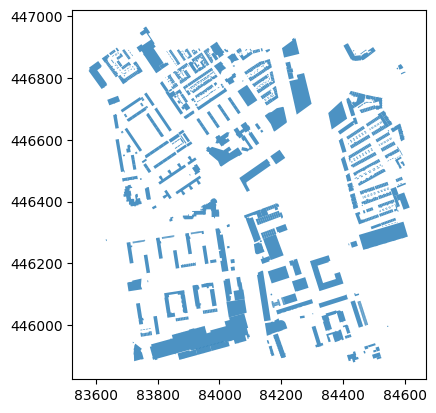

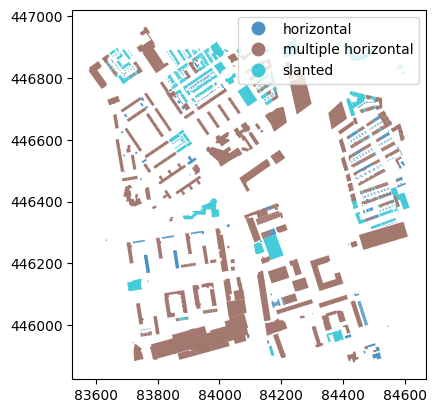

In [4]:
# Plot buildings footprint
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
tile.plot(legend=True, alpha=0.8) # Plain footprint
tile.plot(column='b3_dak_type', legend=True, alpha=0.8) # Footprint roof type

plt.show()

### Additional hints and tricks

**Merging geopandas files**
Say you would like to combine two (or more) tiles of building footprints possibly retrieved from 3DBAG. You just have to concatanate the individual geopandas as shown below.

In [5]:
import pandas as pd

# Load a second tile
path_to_data = "second_tile.gpkg"
second_tile = geopandas.read_file(path_to_data)
# Concatenate geopandas
tile_concat = pd.concat([tile, second_tile], ignore_index=True)

<Figure size 1000x1000 with 0 Axes>

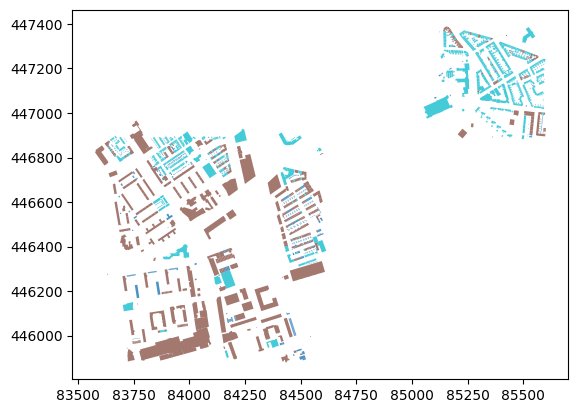

In [10]:
# Plot buildings footprint
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
tile_concat.plot(column='b3_dak_type', legend=False, alpha=0.8) # Footprint roof type
plt.show()

**Transform geographical coordinates**

In [11]:
from pyproj import Transformer

# Create a transformer object for converting from EPSG:4326 to EPSG:28992
transformer = Transformer.from_crs("EPSG:4326", "EPSG:28992", always_xy=True)

# Example coordinates from Google Maps (longitude, latitude)
google_maps_coordinate = (4.475639, 51.922667)  # Longitude, Latitude of Amsterdam

# Transform the coordinate
rd_new_coordinate = transformer.transform(*google_maps_coordinate)

print(f"RD New Coordinate: {rd_new_coordinate}")

RD New Coordinate: (92294.28359305707, 437525.0089365608)


**(Bonus info)**
You can find the geographical coordinates related to all buildings investigated in the group projects.

- Lumiere: 51°55'21.6"N 4°28'32.3"E. // 51.922667, 4.475639.
- Strijp-S: 51°26'48.8"N 5°27'31.9"E. // 51.446889, 5.458861.
- The Stack: 52°23'14.7"N 4°54'13.4"E. // 52.387417, 4.903722.
- SPOT: 52°18'25.6"N 4°56'45.1"E. // 52.307111, 4.945861.

### Processing geographical coordinates for each building

You will be here extracting both aerial and street view images. Following the process described in Tutorial 4, let's first find out the geographical coordinates needed to automate the image extraction process.

- **Aerial images** can be extracted via QGIS by defining two corners of a rectangular box. If you need more details to complete this step, do you know where to look at? Sure, you know! Tutorial 4.

- **Street view images** can be retrieved via Cyclomedia's API based on a geographical coordinate. The API will then send the closest street view image from the specified coordinate. One possible choice would be defining the building coordinate as the centroid of the rectangular bounding box.

<center>
<img src="https://drive.google.com/uc?export=view&id=1VjAOuUjoiafMd-TMCazMIR1cndHfBMxK" alt="floor-layout" class="center" width="500px">
</center>

In this tutorial, you will pick 50 random buildings (maybe the same buildings selected in Tutorial 4), and will find out the coordinates for extracting both aerial and street view images.
To keep the process neat, you can append the coordinates in two dictionaries and store them as json files: `build_dic_aerial.json` and `build_dic_streetview.json`.

In [13]:
# Load Python modules
import numpy as np
import json
import random
'''
get coordinates for each building and stored them in a dictionary
    - Loop over BAG IDs
    - Extract coordinates
    - Compute bounding box
    - Store results
'''

n_buildings = 50 # number of building footprints
additional_padding = 10 # let's add some context (note that this variable is defined in meters)

totaln_buildings = len(tile) # how many building we have in the tile?
random.seed(42) # initialize random seed (if we would like to always get the same sequence of random numbers)

# randomly select n_buildings
ind_build = random.sample(range(totaln_buildings), n_buildings)

'''
Create a dictionary build_coord where:
- Key: building_index (ind_build) # Think of this like a building ID
- Value: A list with a box coordinates that enclose the building footprint

To get the coordinates box, extract the coordinates from geopandas and find the 4 corners with basic min, max operations.
'''
build_coord = {}
street_view_coord = {}
for i in ind_build:
    # Retrieve geographical coordinates from geopandas
    coord = np.array(tile.geometry.iloc[i].exterior.coords)
    # Dictionary: aerial images
    coord_box = []
    coord_box.append(coord[:,0].min() - additional_padding)
    coord_box.append(coord[:,1].min() - additional_padding)
    coord_box.append(coord[:,0].max() + additional_padding)
    coord_box.append(coord[:,1].max() + additional_padding)
    build_coord[i] = coord_box
    # Dictionary: street view images
    coord_point = []
    coord_point.append(coord[:,0].min() + (coord[:,0].max() - coord[:,0].min()) / 2)
    coord_point.append(coord[:,1].min() + (coord[:,1].max() - coord[:,1].min()) / 2)
    street_view_coord[i] = coord_point

with open("build_dic_aerial.json", 'w') as file_id:
    json.dump(build_coord, file_id)

with open("build_dic_streetview.json", 'w') as file_id:
    json.dump(street_view_coord, file_id)

Shall we verify the stored dictionaries make sense?

In [14]:
print(build_coord, street_view_coord)

{1309: [84486.3828125, 446508.4375, 84516.0078125, 446539.90625], 228: [83619.9921875, 446835.59375, 83650.953125, 446865.59375], 51: [83854.484375, 445877.53125, 83938.34375, 445931.8125], 563: [83949.6484375, 446788.875, 83974.4609375, 446813.1875], 501: [83871.296875, 446795.90625, 83895.1640625, 446820.6875], 457: [83941.2578125, 446867.53125, 83971.4921875, 446900.78125], 285: [83609.3046875, 446839.125, 83651.34375, 446883.65625], 209: [83626.96875, 446701.0625, 83688.46875, 446752.03125], 1116: [84495.8203125, 446472.6875, 84527.84375, 446506.25], 178: [83676.1953125, 446802.1875, 83699.8515625, 446825.59375], 1209: [84448.59375, 446553.5, 84478.4609375, 446585.03125], 864: [84118.234375, 446759.59375, 84141.8203125, 446782.96875], 65: [83912.984375, 445893.53125, 83984.46875, 445945.6875], 61: [83946.0546875, 446028.09375, 83972.859375, 446059.65625], 191: [83687.203125, 446857.125, 83716.9609375, 446886.1875], 447: [83948.0859375, 446792.90625, 83974.1875, 446818.34375], 476: 

## (Recap) Retrieving street view images via Cyclomedia's API

Since the process for extracting aerial images is fully described in Tutorial 4, the focus here will be on retrieving street view images. Yes, you already know how to do it, but a quick recap should not hurt.

(Bookkeeping) Where we are at?

In [15]:
!pwd

/content/drive/MyDrive/Tutorial_beyond_boundaries


Here below, we load the required Python module to launch URL requests and create a function to ask Cyclomedia's API the street view images you would like to extract.

In [16]:
# As usual in Python, let's load the necessary modules
import requests
from requests.auth import HTTPBasicAuth

In [ ]:
def get_image(COOR_X,
            COOR_Y,
            name_image='image_0',
            path_image='',
            hfov='90',
            pitch='0',
            yaw='0',
            width='1024',
            height='786',
            index='0'):

    # ! Specify you user and pass here (very private) :)
    username = 'P.G.MoratoDominguez@tudelft.nl' #Your user here
    password = 'Insert here your passworkd' #Your pass here

    # Construct the URL to connect with the API
    URL_START = 'https://atlasapi.cyclomedia.com/api/PanoramaRendering/RenderByLocation2D/'
    CRS = '28992'
    API_KEY = '2XU9ajAxS3YtKvgVCD4h-30lK3IpOb8x-HApGTcRCf09a7UVuX8h-r4ZarYZ2nIB'
    # COOR_X = '94313.15'
    # COOR_Y = '435711.11'
    HFOV = hfov
    PITCH = pitch
    YAW = yaw
    WIDTH = width
    HEIGHT = height
    INDEX = index

    file_name = path_image + name_image + '.png'

    url = URL_START \
    + CRS + '/' \
    + COOR_X + '/' + COOR_Y \
    + '/?width=' + WIDTH + '&height=' + HEIGHT \
    + '&hfov=' + HFOV \
    + '&apiKey=' + API_KEY \
    + '&pitch=' + PITCH + '&yaw=' + YAW \
    + '&index=' + INDEX

    # Contact the API and request the images
    response = requests.get(url, auth=HTTPBasicAuth(username, password))

    if response.status_code == 200: # This means everything went well
        with open(file_name, 'wb') as f:
            f.write(response.content) # Store the images
        return file_name
    else: # If there was an error, we need to know about it!
        print('Error: ', response.status_code)
        return None

Where would you like to store all the street view images? Define the directory below. Note that the folder should exist in your GDrive.

In [17]:
#directory where the images will be stored
street_view_images_path = "/content/drive/MyDrive/Tutorial_beyond_boundaries/street_view/"

Just a reminder, let's check how a single image can be retrieved and we will then automate the process.

In [ ]:
# Only one image (easy!)
coor_x = '68554.7'
coor_y = '445294.4'
get_image(coor_x, coor_y, 'image_0', yaw='0')

'image_0.png'

Well, you have work very hard up to this point. It is time for your PC (or should we say Collab) to do the work for you by automating the process.

Iterate over the geographical coordinate determined for each building footprint and request the corresponding street view image. Unless Cyclomedia already limited your quota, this should work! Enjoy seeing how street images are flowing to your local directory. 😎

In [ ]:
for build_id, coord in street_view_coord.items():
  get_image(str(coord[0]), str(coord[1]), str(build_id), street_view_images_path, yaw='0')
  #print(build_id, coord)

## Computing **urban** embeddings via DinoV2

Being that we are ambitious, we will not stop at computing embeddings (crafter meaningful representations) separetely for aerial and street view images, we will combine both! To do so, we will first compute embeddings separately and will combine them thereafter.

<center>
<img src="https://drive.google.com/uc?export=view&id=1zmw_u_MZLBaMprk6cSx7XKNzROjxaPvj" alt="floor-layout" class="center" width="500px">
</center>

To speak Dino's language, transform the extracted images as shown below and stored the transformed images in two torch tensors, one with aerial images and another one with street view images. Certainly, you are familiar with this process!

In [18]:
# Get vector embeddings from a aerial images
# Load modules
import torch
import os
from PIL import Image
import torchvision.transforms as T

# This is the directory where the extracted images are stored
folder_path_aerial = "aerial"
folder_path_streetview = "street_view"

# Specify here which transformations will be applied to the image
transform = T.Compose([
    T.Resize(256, interpolation=T.InterpolationMode.BICUBIC),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
])

# Prepare a list with all images filenames to run everything in a loop fashion
transformed_images = [] # Initialize a list for the transformed images
list_build_images = ind_build # Recall this is the building index
list_build_images = [str(i) for i in list_build_images]

# And here comes the loop iterating over all aerial images
for img_filename in list_build_images:
    img_path = os.path.join(folder_path_aerial, img_filename + '.png') # Combine path and image name
    #print(img_path) # Let's print out the processed images
    if os.path.isfile(img_path):
        img = Image.open(img_path) # The image is opened by PIL Image function (Think of PIL as a translator)
        t_img = transform(img) # The transformation is now applied here
        transformed_images.append(t_img)  # Append the transformed image to the list
# Convert list of tensors to a single 4D tensor (Recall: one image would be a 3D tensor)
tensor_aerial_images = torch.stack(transformed_images)

transformed_images = [] # Initialize a list for the transformed images
# And here comes the loop iterating over all street view images
for img_filename in list_build_images:
    img_path = os.path.join(folder_path_streetview, img_filename + '.png') # Combine path and image name
    #print(img_path) # Let's print out the processed images
    if os.path.isfile(img_path):
        img = Image.open(img_path) # The image is opened by PIL Image function (Think of PIL as a translator)
        t_img = transform(img) # The transformation is now applied here
        transformed_images.append(t_img)  # Append the transformed image to the list
# Convert list of tensors to a single 4D tensor (Recall: one image would be a 3D tensor)
tensor_streetview_images = torch.stack(transformed_images)

# tensor_images is now a 4D tensor of shape [N, C, H, W], where N is the number of images
print(tensor_aerial_images.shape, tensor_streetview_images.shape)

torch.Size([50, 3, 224, 224]) torch.Size([50, 3, 224, 224])


Let's summon Dino up to our collab notebook and compute embeddings for both aerial and street view images.

In [19]:
dinov2_vits14_reg = torch.hub.load('facebookresearch/dinov2', 'dinov2_vits14_reg')

Downloading: "https://github.com/facebookresearch/dinov2/zipball/main" to /root/.cache/torch/hub/main.zip
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")
Downloading: "https://dl.fbaipublicfiles.com/dinov2/dinov2_vits14/dinov2_vits14_reg4_pretrain.pth" to /root/.cache/torch/hub/checkpoints/dinov2_vits14_reg4_pretrain.pth
100%|██████████| 84.2M/84.2M [00:00<00:00, 186MB/s]


In [20]:
with torch.no_grad(): # Bonus points for whoever guess what this is for!
    aerial_embed = dinov2_vits14_reg(tensor_aerial_images) # Here the magic happens, we plug the tensor of images to DINO and get a compressed representation for free.

# Again the same operation, but this time let's compute embeddings from street view imagery
with torch.no_grad():
    streetview_embed = dinov2_vits14_reg(tensor_streetview_images)

print(aerial_embed.shape, aerial_embed.shape) # Just to check the shape of the tensor

torch.Size([50, 384]) torch.Size([50, 384])


### Concatenating embeddings

As mentioned before, we would like to get a unified vector representation that encapsulates both aerial and street view images. To do so, you just need concatenate the already computed embeddings. Note there are other approaches to combine embeddings, but this is a simple yet effective one. Wouldn't you agree?

In [21]:
urban_embed = torch.cat((aerial_embed, streetview_embed), dim=1)

print(urban_embed.shape)

torch.Size([50, 768])


In [22]:
# In case you would like to store the computed tensor, why not?
torch.save(urban_embed, 'urban_embed_embeddings.pt')
#loaded_embedding = torch.load('urban_embed_embeddings.pt')

## Urban similarity based on Euclidean distance

Great, you can now rely on the computed urban embedding to perform a variety of tasks. In this tutorial, we will again focus on information retrieval and will determine (dis)similar buildings based on their distance in the urban embedding space.

Reusing a function from Tutorial 4, we can compute the Euclidean distance among all picked buildings.

In [23]:
# Define the function to compute Euclidean distances
def pairwise_euclidean_distance(x):
    num_samples = x.size(0) # Size of our tensor
    distances = torch.zeros((num_samples, num_samples)) # Initialize a tensor where the distances will be stored

    # Looping over the elements in the tensor
    # We will compute the distance of all elements with all elements
    for i in range(num_samples):
        for j in range(num_samples):
            # Compute the Euclidean distance between x[i] and x[j]
            distances[i, j] = torch.sqrt(torch.sum((x[i] - x[j]) ** 2))

    return distances

In fact, let's calculate Euclidean distances according to the embeddings computed for all cases: (i) aerial images, (ii) street view images, (iii) combined urban representation.

In [24]:
distance_aerial = pairwise_euclidean_distance(aerial_embed)
distance_streetview = pairwise_euclidean_distance(streetview_embed)
distance_urban = pairwise_euclidean_distance(urban_embed)

Not strictly necessary, but you can visualize the Euclidean distance for all examined cases.

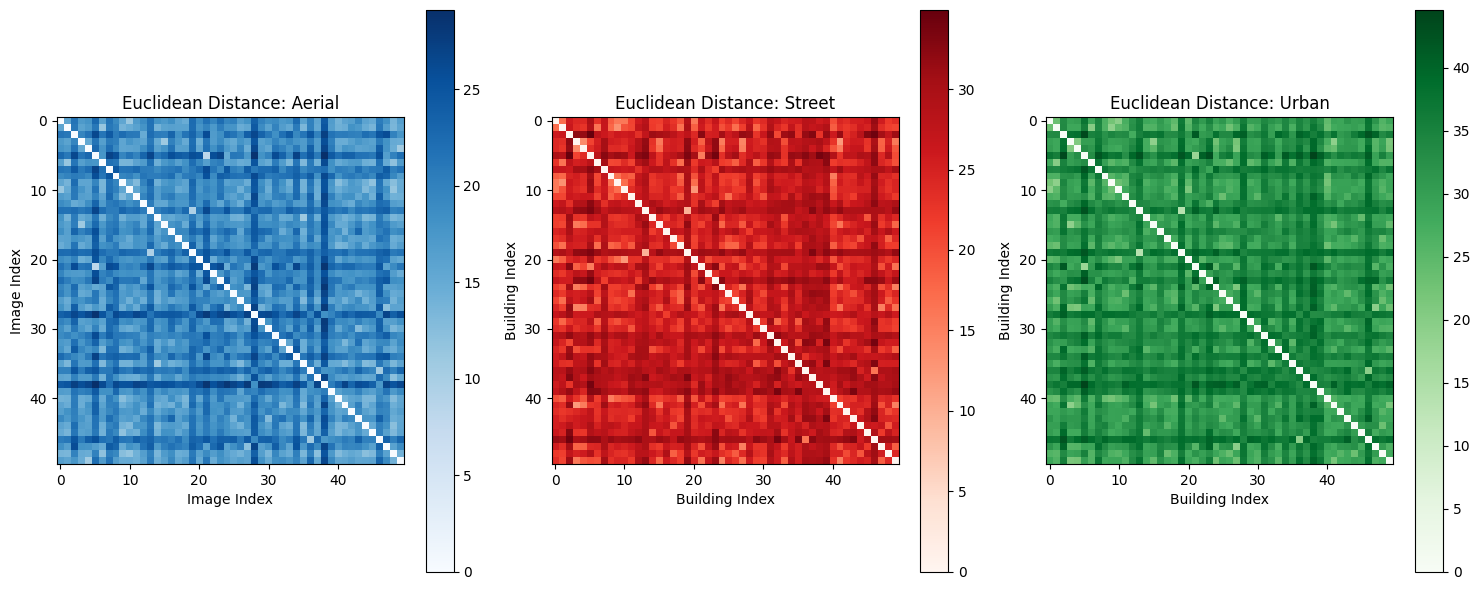

In [25]:
# Plot the distance matrix
figs, axs = plt.subplots(1, 3, figsize=(15, 6))

im1 = axs[0].imshow(distance_aerial, interpolation='nearest', cmap='Blues')
figs.colorbar(im1, ax=axs[0])
axs[0].set_title('Euclidean Distance: Aerial')
axs[0].set_xlabel('Image Index')
axs[0].set_ylabel('Image Index')

im2 = axs[1].imshow(distance_streetview, interpolation='nearest', cmap='Reds')
figs.colorbar(im2, ax=axs[1])
axs[1].set_title('Euclidean Distance: Street')
axs[1].set_xlabel('Building Index')
axs[1].set_ylabel('Building Index')

im3 = axs[2].imshow(distance_urban, interpolation='nearest', cmap='Greens')
figs.colorbar(im3, ax=axs[2])
axs[2].set_title('Euclidean Distance: Urban')
axs[2].set_xlabel('Building Index')
axs[2].set_ylabel('Building Index')

plt.tight_layout()
plt.show()

You will now select one building (out of the 50 selected) and will find out similar buildings based on the computed distances.

In [26]:
# Distance with respect to one building (index = 0)
distance_query_aerial = distance_aerial[0].tolist()
distance_query_streetview = distance_streetview[0].tolist()
distance_query_urban = distance_urban[0].tolist()

## Visualizing building similarity

You have now computed the distance between a selected (query) building and a gallery of 50 random buildings. Wouldn't it be great to visualize the results on a map? Let's do it. Are you more comfortable coding Python or interacting with QGIS interface? Either way will work!

To visualize building similarity on a map, you will attach the computed distances as additional columns to the original tile geopandas. Yes, the cycle is closing and we are moving back to the tile.


In [27]:
# First, we add (sort of empty) columns to the tile. One for each case.
tile['aerial_similarity'] = np.nan
tile['streetview_similarity'] = np.nan
tile['urban_similarity'] = np.nan

# Then, we iterate over all 50 building footprints and include the correspinding distance.
i = 0
for index in ind_build:
  tile.at[index, 'aerial_similarity'] = distance_query_aerial[i]
  tile.at[index, 'streetview_similarity'] = distance_query_streetview[i]
  tile.at[index, 'urban_similarity'] = distance_query_urban[i]
  i += 1

Let's now store our modified geopandas file, which contains now building similarity information.

In [ ]:
# Store GeoPandas
tile.to_file("urban_distance.gpkg", driver='GPKG')

### Visualizations directly on Python

You can now visualize, set up, and store plots directly on Python. Alternatively, this task can be done via QGIS' interface.

Let's plot, for instance, urban similarity. Note that you can refine the code to produce a figure that satisfy your needs.

<Axes: >

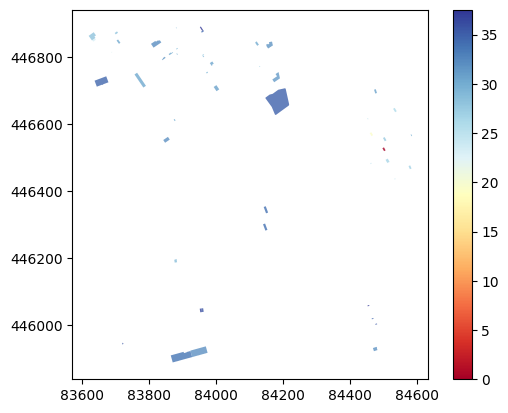

In [31]:
tile.plot(column='urban_similarity', legend=True, alpha=0.8, cmap='RdYlBu')

Another example below. Here building similarity is visualized based on embeddings computed from aerial, street view images, and a combination thereof.

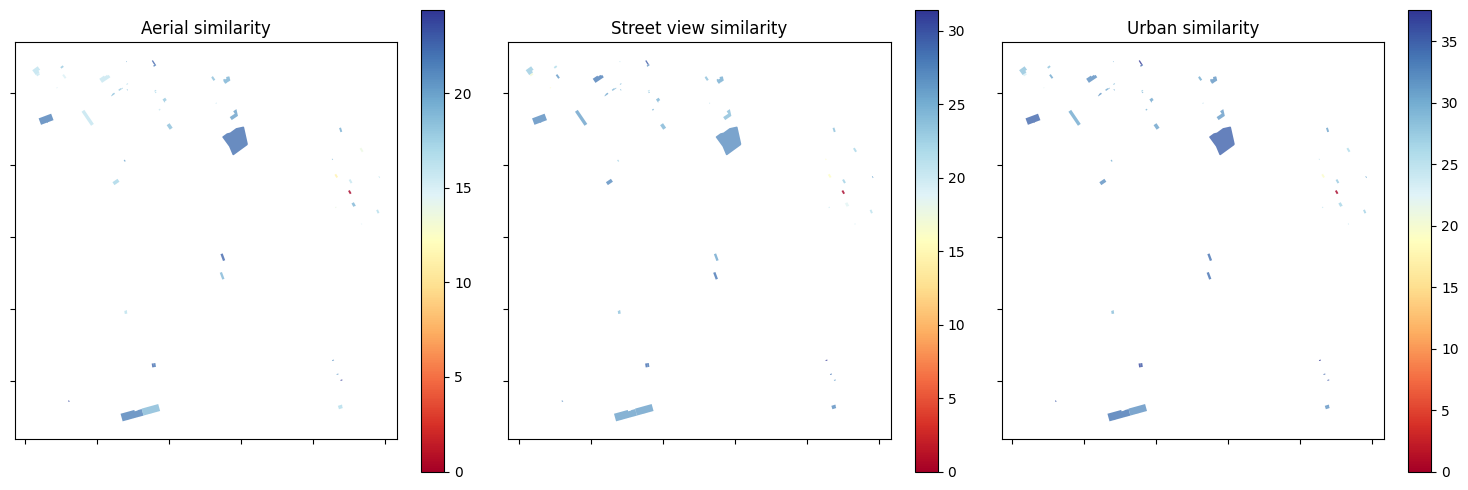

In [32]:
# Create a figure and 3 subplots, organized horizontally (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plotting the same 'column' with different color maps on each subplot
tile.plot(column='aerial_similarity', ax=axs[0], legend=True, alpha=0.8, cmap='RdYlBu')
tile.plot(column='streetview_similarity', ax=axs[1], legend=True, alpha=0.8, cmap='RdYlBu')
tile.plot(column='urban_similarity', ax=axs[2], legend=True, alpha=0.8, cmap='RdYlBu')

# Set titles for each subplot for clarity
axs[0].set_title('Aerial similarity')
axs[1].set_title('Street view similarity')
axs[2].set_title('Urban similarity')

# Remove axis labels and tick labels for all subplots
for ax in axs:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Adjust layout to make room for the legend
plt.tight_layout()

# Display the plot
plt.show()

(Optional) You can also visualize the images corresponding to certain building by following the code below. I know you are curious enough and would like to verify the results.


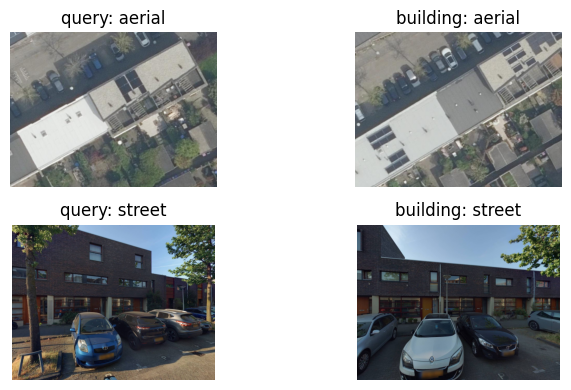

In [33]:
query_index = 1309
building_index = 1209

# Create the matplotlib grid for visualization
fig, axs = plt.subplots(2, 2, figsize=(2 * 4, 1 * 4))

aerial_image_ = "aerial/"+str(query_index)+".png"
image_sim = np.array(Image.open(aerial_image_))
axs[0, 0].imshow(image_sim)
axs[0, 0].set_title("query: aerial")  # Optional: Show filename as title
axs[0, 0].axis('off')  # Hide axes for better visualization

aerial_image_ = "aerial/"+str(building_index)+".png"
image_dis = np.array(Image.open(aerial_image_))
axs[0, 1].imshow(image_dis)
axs[0, 1].set_title("building: aerial")  # Optional: Show filename as title
axs[0, 1].axis('off')  # Hide axes for better visualization

streetview_image_ = "street_view/"+str(query_index)+".png"
image_sim = np.array(Image.open(streetview_image_))
axs[1, 0].imshow(image_sim)
axs[1, 0].set_title("query: street")  # Optional: Show filename as title
axs[1, 0].axis('off')  # Hide axes for better visualization

streetview_image_ = "street_view/"+str(building_index)+".png"
image_dis = np.array(Image.open(streetview_image_))
axs[1, 1].imshow(image_dis)
axs[1, 1].set_title("building: street")  # Optional: Show filename as title
axs[1, 1].axis('off')  # Hide axes for better visualization

plt.tight_layout()
plt.show()

### Visualization via QGIS interface

**Import GeoPandas file**

To import a GeoPandas package, go to the data source manager and upload the file as indicated in the illustration below.

<center>
<img src="https://drive.google.com/uc?export=view&id=1YHWE6roq3vuKu0V6gFnhJKvZqv5sa2JE" alt="floor-layout" class="center" width="500px">
</center>


**Set up visualization settings**

GeoPandas loaded, yeah! You can now color-code building footprints according to the computed distance by changing the properties of the layer. Specifically, you can color-code items categorically or gradually. The latter can be very useful to visualize similarity measures. But, of course, you are free to decide the final setup.

<center>
<img src="https://drive.google.com/uc?export=view&id=1Xeh6hTlppwydBgIGDY819TEJSZjwZD0O" alt="floor-layout" class="center" width="500px">
</center>

**Export canvas (map)**

Once you have finalized adjusting the colormap (surely you will take some time to make up your mind), you can then export the map as indicated below. There are two options:
- Fast export: you can quickly export the map as a pdf/image.
- Detailed export: additional settings can be carefully selected if you create a new print layout.

You can find more info [here](https://docs.qgis.org/3.34/en/docs/training_manual/map_composer/map_composer.html).

<center>
<img src="https://drive.google.com/uc?export=view&id=1CGSxUEUTfdHf3Vg2dBmKV2yIHwG9-39v" alt="floor-layout" class="center" width="500px">
</center>

# Group assignment: Find similar buildings at scale!

- 3p: retrieve an aerial and a street view image for each building footprint contained in the tile that corresponds to the building from your project. The number of building footprints can be filtered, but should be at least ~ 1000. (ETC: 180 mins)
- 1p: compute the embedding representations of all collected aerial and street view images through DINOv2 (ETC: 60 mins)
- 1p: combine the embeddings from aerial and street view images for each building by concatenating the two vectors. This will become your *gallery dataset*. (ETC: 30 mins)
- 2p: specify the embedding from your project's building as a query and compute the Euclidean distance between your building *query* and all the other embeddings included in the *gallery dataset*. Tip: you may postprocess your query aerial and/or street view images so that they resemble most of the to-be-built building if the project has not been completed yet. (ETC: 60 mins)
- 3p: visualize the computed urban similarity on a map, color-coding buildings according to their distance to your *query* building. (ETC: 120 mins)

### **Output**</br>
**Document your work in a new notebook** and name it **"A6_urban_similarity_\<name\>.ipynb"**. Also, submit the resulting urban similarity map, named as **"A6_urban_similarity_\<name\>.pdf"**.

- Deadline: Tuesday, April 16